# Colab Start Section

Step 1 is to upload a copy of your private key. I am assuming your private key is named id_ed25519. If that isn't the case, you'll have to make manual changes.

In [1]:
# Change these of course to what is your email and your GitHub username
EMAIL = "pauleanderson@gmail.com"
USERNAME = "pauleanderson"

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
%%bash -s "$EMAIL" "$USERNAME"

rm -rf /root/.ssh/*
mkdir /root/.ssh

mv id_ed25519 /root/.ssh/

chmod 600 /root/.ssh/id_ed25519

git config --global user.email "$1"
git config --global user.name "$2"

In [2]:
%%bash -s "$USERNAME"

eval "$(ssh-agent -s)"

ssh-add ~/.ssh/id_ed25519

ssh-keyscan -t rsa github.com >> ~/.ssh/known_hosts

git clone git@github.com:anderson-fall-2024/csc-448-$1.git

UsageError: Cell magic `%%shell` not found.


# Topic 1
# Where in the Genome Does DNA Replication Begin?
## Secondary Title: Algorithm Warmup

Motivation and some exercises are variations on those available in Bioinformatics Algorithms: An Active-Learning Approach by Phillip Compeau & Pavel Pevzner.

### Learning objectives for the week and lab:
1. Build our mental model of biology (two ways)
2. Warm up our algorithm abilities after summer break
3. Gain experience translating a biological problem into a problem we can solve via code

In [3]:
#### NO NEED TO EDIT ####
NOTEBOOK = "Topic1"

%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0,f"csc-448-{USERNAME}/py448")
sys.path.insert(0,"../py448")

from importlib import import_module
helper = import_module(f'{NOTEBOOK}_helper')

## BEGIN SOLUTION
import joblib
answers = {}
## END SOLUTION
#### NO NEED TO EDIT ####

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Molecular biology for bioinformatics
Short introduction into some of the concepts we must familiarize ourselves with in this class. We will add to our biological knowledge a little bit at a time.

Credit for some of this content comes from: http://web.stanford.edu/class/cs173/papers/primer.pdf

<img src="https://www.thoughtco.com/thmb/pTDTZI1GH12gJr-DEyozAcVOGvA=/1500x1039/filters:fill(auto,1)/genes-DNA-573388755f9b58723d5eb4fd.jpg" width=800>

### Goals of Molecular Biology
* Sequencing and comparing full genomes of organisms.
* Identifying the genes and determining the foundations of the proteins they encode.
* Understanding gene expression.
* Understanding genetic diseases.
* Understanding evolution and evolutionary history.
* Understanding proteins, which means predicting the folding of the amino acid
sequence, and characterizing the function of the protein based on this folding.
* Constructing synthetic proteins, which means creating amino acid sequences,
such that the protein produced from these have a desired function.

### Polymers
Three types of polymers will play a roll in this class and in biology: DNA, RNA, and proteins

DNA sequences are the information-containing molecules and are composed of
nucleotides from an alphabet of four letters: A, C, G and T. The DNA of an organism plays a central role in its existence. It is arranged in
the form of chromosomes. These strings may be millions of nucleotides long,
measured in base pairs (bp).

The entire set of genetic information of an organism is called its genome. Genome sizes vary for different species.

<img src="https://old-ib.bioninja.com.au/_Media/genome-size-table_med.jpeg" widt=300>

Proteins, which are the operational molecules, are composed of chains of amino
acids, called polypeptides, each from an alphabet of 20 letters:
    
<img src="https://qph.fs.quoracdn.net/main-qimg-aaa1523b121f7374bb1bdc294d0107ba">

RNA sequences, which stand between DNA and protein, are composed of nucleotides from an alphabet of four letters: A, C, G, U.

The Central Dogma of Molecular Biology describes the interaction of these polymers:
- DNA acts as a template to replicate itself;
- DNA is also transcribed into RNA; and
- RNA is translated into protein.

<img src="https://cdn1.byjus.com/wp-content/uploads/2018/11/Central-Dogma-DNA-to-RNA-to-Protein.png">

1. Replication of DNA.
Each strand in a DNA is a chemical ”mirror image” of the other. If there is
an a on one strand, there will always be a t in the same position on the other
strand, and vice versa; if there is a c on the one strand, its ”partner” on the
other strand will always be a g, and vice versa.
When a cell divides to form daughter cells, DNA is replicated by untwisting the
two strands and using each strand as a template to produce its chemical mirror
image.
2. Transcription of DNA.
DNA also act as a blueprint for RNA, more exactly three main types of RNA:
messenger RNA (mRNA), transfer RNA (tRNA), and ribosomal RNA (rRNA).
They carry information from the genome to the ribosomes, the protein synthesis
apparatus in a cell.
3. Translation of mRNA.
The information in an mRNA will be translated into a sequence of amino acids,
creating a polypeptide molecule.3

#### More on proteins

"Organic chemistry is the chemistry of carbon compounds. Biochemistry is the study of carbon compounds that crawl." - Mike Adam

Example, human insulin is composed by two words (chains of amino acids):

A: gly ile val glu gln cys cys thr ser ile cys ser leu tyr glu leu glu asn tyr cys asn.

B: phe val asn gln his leu cys gly ser his leu val glu ala leu tyr leu val cys gly glu arg
gly phe phe tyr thr pro lys thr.

The function of a protein is a direct consequence of its three-dimensional structure

### More on genes
Historically, the heritable factors which determine much of the physical make up of
organisms are called genes.

Usually there are several different forms one gene can have. These forms are called
alleles.

A combination of alleles describes the make-up of an individual, more exactly:
* The genetic make-up of an individual is its genotype.
* The expression of the genes of an individual is its phenotype.

**Stop and think:** Find as many different pictures of human insulin protein and insert them here.

**Stop and think:** Why are there different pictures?

**Stop and think:** Now find the gene sequence of insulin and paste it below.

## Genome Replication
* One of most important tasks carried out in the cell. 
* Must be carried out before cell division
* In 1953, James Watson and Francis Crick ended their paper on DNA double helix with:

"It has not escaped our notice that the specific pairing we have postulated immediately suggests a possible copying mechanism for the genetic material."

<img src="https://images.fineartamerica.com/images/artworkimages/mediumlarge/1/watson-and-crick-a-barrington-brown-and-photo-researchers.jpg" alt="drawing" width="400"/>

## History and controversy
We shouldn't mention Dr. James Watson without discussing his unfounded pronouncements on genetics, race, and intelligence - https://www.nytimes.com/2019/01/01/science/watson-dna-genetics-race.html

I reject these views as despicable and they have no place in science. Instead I will discuss the first bioinformatician: Margaret Dayhoff (1925-1983). 

<img width=500 src="https://th-thumbnailer.cdn-si-edu.com/GmajFEn1eTINwE6DwIzMQ7YmO6g=/1072x720/filters:no_upscale()/https://tf-cmsv2-smithsonianmag-media.s3.amazonaws.com/filer/07/5c/075cc94d-bc5e-40c7-8dc5-cea9f0461493/margaret_dayhoff.jpg">

<img width=500 src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTTHGxsUleSB-Y7poOJghLcGMEVzbpx0iA-mA&s">

Margaret Dayhoff produced COMPROTEIN, the first bioinformatics software. (A) An IBM 7090 mainframe, for which COMPROTEIN was made to run. (B) A punch card containing one line of FORTRAN code (the language COMPROTEIN was written with). (C) An entire program’s source code in punch cards. (D) A simplified overview of COMPROTEIN’s input (i.e. Edman peptide sequences) and output (a consensus protein sequence).

## Let's review some biology
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/37/Difference_DNA_RNA-EN.svg/1200px-Difference_DNA_RNA-EN.svg.png" width="600"/>



## DNA and RNA code
* Not a binary alphabet
* DNA alphabet: AGCT
* RNA alphabet: AGCU
* Nucleotides are complementary (A binds to T and G binds to C)
* Replication begins at replication origin (*ori*)
* **Binary is a base-2 system, what is DNA/RNA?**

## Why should I care?
* DNA polymerases - molecular copy machines that start by locating a *ori* - origin of replication
* Some gene therapy methods use genetically engineered mini-genomes, which are called **viral vectors**
* Viral vectors are able to penetrate cell walls
* Viral vectors carry artificial genes that have been used to engineer frost-resistant tomatoes and pesticide-resistant corn. 

In 1990, **gene therapy was successfully performed on humans when it saved the life of a four year old girl** suffered from Severe Combined Immunodeficiency Disorder.

How does this relate to this topic? 
* To ensure the treatment works, scientists must know the location of *ori* and avoid disrupting this site.

# Looking for *ori*
Verified *ori* of Vibrio cholerae, the bacterium that causes cholera (~500 nucleotides):
<pre>
atcaatgatcaacgtaagcttctaagcatgatcaaggtgctcacacagtttatccacaac
ctgagtggatgacatcaagataggtcgttgtatctccttcctctcgtactctcatgacca
cggaaagatgatcaagagaggatgatttcttggccatatcgcaatgaatacttgtgactt
gtgcttccaattgacatcttcagcgccatattgcgctggccaaggtgacggagcgggatt
acgaaagcatgatcatggctgttgttctgtttatcttgttttgactgagacttgttagga
tagacggtttttcatcactgactagccaaagccttactctgcctgacatcgaccgtaaat
tgataatgaatttacatgcttccgcgacgatttacctcttgatcatcgatccgattgaag
atcttcaattgttaattctcttgcctcgactcatagccatgatgagctcttgatcatgtt
tccttaaccctctattttttacggaagaatgatcaagctgctgctcttgatcatcgtttc
</pre>

## DnaA box
* **There is a hidden message in *ori* that orders the cell to begin replication here.**
* We know that the initiation of replication is mediated by a protein called **DnaA** that looks for a short segment within *ori*.
* This short segment is known as a *DnaA box*
* **Biologists want to find this hidden message, but is that clearly defined enough for us CS/STAT/MATH/EGR folks?**

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/bb/PDB_2hcb_EBI.jpg/220px-PDB_2hcb_EBI.jpg">

## Counting words
* Turns out that the patterns in our DNA are not random. 
* Some patterns are more common than others. 
* Biologically speaking this helps because certain protins can only bind to DNA if a specific string of nucleotides is present and if that string is more prevelant then we have a greater chance of success (and less likely a mutation will cause problems). 
* We are going to refer to a *k*-mer as a string of length *k*.

### Why? Why? Why?
"Nothing in biology makes sense except in the light of evolution." - Theodosius Dobzhansky

We are looking for surprisingly frequent substrings (contiguous strings appearing within) this *ori*.
<pre>
atcaatgatcaacgtaagcttctaagcatgatcaaggtgctcacacagtttatccacaac
ctgagtggatgacatcaagataggtcgttgtatctccttcctctcgtactctcatgacca
cggaaagatgatcaagagaggatgatttcttggccatatcgcaatgaatacttgtgactt
gtgcttccaattgacatcttcagcgccatattgcgctggccaaggtgacggagcgggatt
acgaaagcatgatcatggctgttgttctgtttatcttgttttgactgagacttgttagga
tagacggtttttcatcactgactagccaaagccttactctgcctgacatcgaccgtaaat
tgataatgaatttacatgcttccgcgacgatttacctcttgatcatcgatccgattgaag
atcttcaattgttaattctcttgcctcgactcatagccatgatgagctcttgatcatgtt
tccttaaccctctattttttacggaagaatgatcaagctgctgctcttgatcatcgtttc
</pre>
Are there any substrings that occur more frequent than others?

Before we go about searching for unknown substrings, we'll write a function that counts the number of occurances of a specific substring.

**Exercise 1.**
A *k*-mer is a string of length ``k``. For this exercise, define a function ``count(text, pattern)`` as the number of times that a k-mer ``pattern`` appears as a substring of ``text``. For example,

For example:
<pre>
count("ACAACTATGCATACTATCGGGAACTATCCT","ACTAT")=3.
</pre>
Please note that count("CGATATATCCATAG", "ATA") is equal to 3 (not 2) since we should account for overlapping occurrences of ``pattern`` in ``text``.

In [4]:
## BEGIN SOLUTION
answers["answer_exercise_1a"] = helper.count("ACAACTATGCATACTATCGGGAACTATCCT","ACTAT")
answers["answer_exercise_1b"] = helper.count("ACAACTATGCATACTATCGGGAACTATCCT","AC")
answers["answer_exercise_1c"] = helper.count("ACAACTATGCATACTATCGGGAACTATCCT","GA")
## END SOLUTION
helper.count("ACAACTATGCATACTATCGGGAACTATCCT","ACTAT")

3

**Exercise 2.** Find the most frequent *k*-mers in a string.
* Input: A string ``text`` and an integer ``k``.
* Output: All most frequent *k*-mers in ``text`` and their count.
* Requirements: Do not use a dictionary/map

In [5]:
## BEGIN SOLUTION
answers["answer_exercise_2a"] = helper.frequent_words("ACAACTATGCATACTATCGGGAACTATCCT",4)
answers["answer_exercise_2b"] = helper.frequent_words("ACAACTATGCATACTATCGGGAACTATCCT",5)
answers["answer_exercise_2c"] = helper.frequent_words("ACAACTATGCATACTATCGGGAACTATCCT",3)
## END SOLUTION
print(helper.frequent_words("ACAACTATGCATACTATCGGGAACTATCCT",5))
print(helper.frequent_words("ACAACTATGCATACTATCGGGAACTATCCT",4))

(['ACTAT'], 3)
(['ACTA', 'CTAT'], 3)


**Problem 4:** What is the Big-O of frequent words? Define ``|text|`` as the length of ``text`` and ``k`` as an integer. Assume the unit of measurement is comparing a single charater (i.e., comparing ABC to DEF costs 3 units).

A. '|text|^2'<br>
B. '|text|^2*k'<br>
C. 'k^2'<br>

##### BEGIN SOLUTION
B
##### END SOLUTION

**Your answer here**

### Now let's look at the *ori* and see what 9-mers appear

In [6]:
text = "atcaatgatcaacgtaagcttctaagcatgatcaaggtgctcacacagtttatccacaacctgagtggatgacatcaagataggtcgttgtatctccttcctctcgtactctcatgaccacggaaagatgatcaagagaggatgatttcttggccatatcgcaatgaatacttgtgacttgtgcttccaattgacatcttcagcgccatattgcgctggccaaggtgacggagcgggattacgaaagcatgatcatggctgttgttctgtttatcttgttttgactgagacttgttaggatagacggtttttcatcactgactagccaaagccttactctgcctgacatcgaccgtaaattgataatgaatttacatgcttccgcgacgatttacctcttgatcatcgatccgattgaagatcttcaattgttaattctcttgcctcgactcatagccatgatgagctcttgatcatgtttccttaaccctctattttttacggaagaatgatcaagctgctgctcttgatcatcgtttc"
helper.frequent_words(text,9)

(['atgatcaag', 'ctcttgatc', 'cttgatcat', 'tcttgatca'], 3)

Notice anything interesting about the sequences?

As previously stated, nucleotides only bind to their complement, so A and T bind and G and C bind. It is also true that DNA is read in specific direction. Very much in the same way we read left to right. DNA is read from what is called the 5' end to the 3' end.

<img src="https://image.slidesharecdn.com/dna-replication-lin-140210083429-phpapp02/95/dna-replicationlin-4-638.jpg?cb=1392021295" width=400/>

So we can now understand and look for something very important called a reverse complement. The definition of which is right there in the name. ACTG is the reverse complement of CAGT. Let's now write a simple funciton to find the reverse complement.

**Exercise 3.** Write a function that find the reverse complement of a DNA sequence.
* Input: A string ``text`` representing DNA.
* Output: The reverse complement of ``text``.

In [7]:
## BEGIN SOLUTION
answers["answer_exercise_3"] = helper.reverse_complement("cagt")
## END SOLUTION
helper.reverse_complement("cagt")

'actg'

### Back to our 9-mers

In [8]:
solutions = helper.frequent_words(text,9)
print(solutions)
print("Reverse complement of first 9-mer:",helper.reverse_complement(solutions[0][0]))

(['atgatcaag', 'ctcttgatc', 'cttgatcat', 'tcttgatca'], 3)
Reverse complement of first 9-mer: cttgatcat


**Problem 4.** What is interesting about the reverse complement of the first 9-mer?

**Your answer here**

### Writing faster code
**Exercise 4.** Let's now write faster code that produces a frequency map. 
* Input: A string ``text`` representing DNA and integer ``k``.
* Output: a frequency map (Python dictionary) that maps every pattern of size ``k`` to the number of times that pattern occurs.

In [9]:
## BEGIN SOLUTION
answers["answer_exercise_4"] = helper.frequency_table(text,3)
## END SOLUTION
freq_map = helper.frequency_table(text,3)
freq_map

{'atc': 21,
 'tca': 17,
 'caa': 12,
 'aat': 10,
 'atg': 15,
 'tga': 25,
 'gat': 21,
 'aac': 3,
 'acg': 7,
 'cgt': 5,
 'gta': 4,
 'taa': 6,
 'aag': 12,
 'agc': 10,
 'gct': 10,
 'ctt': 17,
 'ttc': 12,
 'tct': 16,
 'cta': 3,
 'gca': 3,
 'cat': 16,
 'agg': 5,
 'ggt': 4,
 'gtg': 5,
 'tgc': 8,
 'ctc': 14,
 'cac': 5,
 'aca': 7,
 'cag': 2,
 'agt': 2,
 'gtt': 11,
 'ttt': 16,
 'tta': 10,
 'tat': 6,
 'tcc': 7,
 'cca': 8,
 'acc': 5,
 'cct': 9,
 'ctg': 10,
 'gag': 6,
 'tgg': 4,
 'gga': 7,
 'gac': 13,
 'aga': 8,
 'ata': 7,
 'tag': 5,
 'gtc': 1,
 'tcg': 7,
 'ttg': 17,
 'tgt': 10,
 'tac': 7,
 'act': 9,
 'cgg': 5,
 'gaa': 7,
 'aaa': 4,
 'att': 11,
 'ggc': 3,
 'gcc': 8,
 'cgc': 4,
 'gcg': 4,
 'ggg': 1,
 'cga': 7,
 'ccg': 3,
 'ccc': 1}

## A word about packages
I try to limit the number of Python packages that you need for this class. They are roughly pandas+numpy and networkx.

In your project, you are welcome to use bioinformatics Python and non-Python packages. You are encouraged to do so.

In [10]:
# I'm only using pandas here so the output is presentable,
# you can remove it of course and see the full dictionary
import pandas as pd
pd.Series(helper.frequency_table(text,3))

atc    21
tca    17
caa    12
aat    10
atg    15
       ..
gcg     4
ggg     1
cga     7
ccg     3
ccc     1
Length: 64, dtype: int64

### Write better frequent words
**Exercise 5.** Write a function that finds the frequent patterns using a dictionary/map. 
* Input: A string ``text`` representing DNA and integer ``k``.
* Output: All most frequent *k*-mers in ``text`` and their count.
* Requirements: Use your frequency_table function (i.e., use the dictionary).

In [11]:
## BEGIN SOLUTION
answers["answer_exercise_5"] = helper.better_frequent_words(text,9)
## END SOLUTION
helper.better_frequent_words(text,9)

(['atgatcaag', 'ctcttgatc', 'tcttgatca', 'cttgatcat'], 3)

### Clump Finding Problem
* Imagine you are trying to find *ori* in a newly sequenced genome
* Old frequent hidden messages won't be useful
* One solution is to use a sliding window and look for a region where a $k$-mer appears several times in short succession
* For example if TGCA forms a (25,3)-clump then it appears at least 3 times in a window of length 25

Even if we solve the clump finding problem, we still have an issue
* Specifically, for the *E. coli* genome we find hundreds of different 9-mers forming (500,3)-clumps
* This makes it absolutely unclear which of these 9-mers might represent a DnaA box in the bacterium’s *ori* region.
* Please carefully read the sections entitled "The Simplest Way to Replicate DNA" and "Asymmetry of Replication" in the book. Dig into the biology, but the abstract model/representation we are using in this class does not require you to understand that biology in detail. Chat with me in Slack about what you find confusing and interesting. 

### Statistics of the Foward and Reverse Half-Strands
The most important consequence for us from the discussion of DNA replication is that we now have four pieces:
1. Forward half-strand x 2
2. Reverse half-strand x 2

<img src="http://bioinformaticsalgorithms.com/images/Replication/half_strands.png" width=400>



### Why does this matter?
Consider the genome of *Thermotoga petrophila*. If we count the nucleotides in the forward and reverse half strands, then we get the following:

<img src="http://bioinformaticsalgorithms.com/images/Replication/forward_reverse_nucleotide_counts.png" width=400>

**Notice that the number of C's and G's is different in the reverse and forward half-strand. Why is this?**

Take a minute to read this and then we will discuss together and then we will discuss:

"It turns out that we observe these discrepancies because cytosine (C) has a tendency to mutate into thymine (T) through a process called deamination. Deamination rates rise 100-fold when DNA is single-stranded, which leads to a decrease in cytosine on the forward half-strand. Also, since C-G base pairs eventually change into T-A base pairs, deamination results in the observed decrease in guanine (G) on the reverse half-strand (recall that a forward parent half-strand synthesizes a reverse daughter half-strand, and vice-versa)." - Bioinformatics Algorithms 3rd Edition

For more biology, I like this: https://www.youtube.com/watch?v=Sa1iRB7wAEs&ab_channel=HussainBiology

### Minimum skew problem
We can use this statistic to find the *ori*.

Our idea is to traverse the genome, keeping a running total of the difference between the counts of G and C. If this difference starts increasing, then we guess we are on the forward half-strand. If this difference starts decreasing, then we guess that we are on the reverse half-strand.


<img src="http://bioinformaticsalgorithms.com/images/Replication/increasing_decreasing_skew.png" width=600>


We define $Skew_i(Genome)$ as the difference between the total number of occurrences of G and the total number of occurrences of C in the first $i$ nucleotides of Genome. 

Note that we can compute $Skew_i(Genome)$ incrementally.  

If the next nucleotide is G, then $Skew_{i+1}(Genome)$ = $Skew_i(Genome)$ + 1

if this nucleotide is C, then $Skew_{i+1}(Genome)$ = $Skew_i(Genome)$ – 1

otherwise, $Skew_{i+1}(Genome)$ = $Skew_i(Genome)$.

**Exercise 6:** Compute the skew at every position of a Genome

Input: A DNA string Genome.

Output: An array that computes the $Skew_i(Genome)$. You can assume $Skew_0(Genome)$=0

**Read in the *E coli* genome**

In [12]:
import pandas as pd
data = pd.read_table("http://bioinformaticsalgorithms.com/data/realdatasets/Rearrangements/E_coli.txt",header=None)
genome = data.values[0,0]

In [13]:
## BEGIN SOLUTION
answers["answer_exercise_6"] = helper.skew(genome)
## END SOLUTION
skews = helper.skew(genome)

In [14]:
# Again I'm using pandas because the display would be horrible otherwise.
# I will either give you the pandas code or teach you that pandas/numpy code
skews = pd.Series(helper.skew(genome))
skews

0             0
1             0
2             1
3             0
4             0
           ... 
4639671   -2630
4639672   -2630
4639673   -2630
4639674   -2630
4639675   -2631
Length: 4639676, dtype: int64

Text(0, 0.5, 'Skew')

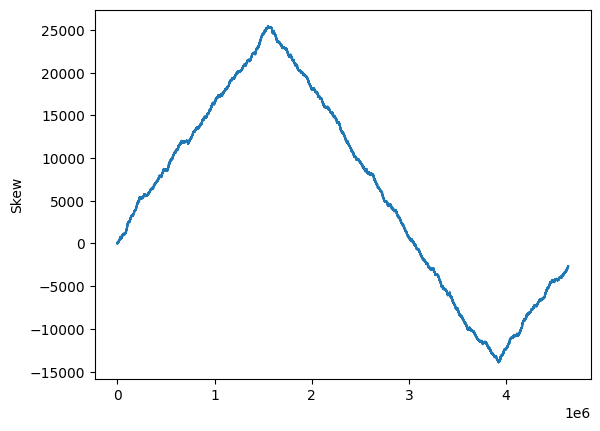

In [15]:
%matplotlib inline
ax=skews.plot.line();
ax.set_ylabel('Skew')

Where do you think the *ori* is located?

In [16]:
print('Position:',skews.idxmin()+1)

Position: 3923621


In [17]:
## BEGIN SOLUTION
joblib.dump(answers,f"../tests/answers_{NOTEBOOK}.joblib");
## END SOLUTION
# Good job!

# Test your code

In [21]:
%%bash -s "$USERNAME"

cd csc-448-$1/tests
pytest test_Topic1.py

============================= test session starts ==============================
platform darwin -- Python 3.9.6, pytest-8.3.3, pluggy-1.5.0
rootdir: /Users/pander14/GitHub/csc-448-instructor/tests
plugins: anyio-4.6.0
collected 6 items

test_Topic1.py ......                                                    [100%]

============================== 6 passed in 3.14s ===============================


# Colab End Section - Submit your code

In [ ]:
%%bash -s "$USERNAME"

eval "$(ssh-agent -s)"

ssh-add ~/.ssh/id_ed25519

ssh-keyscan -t rsa github.com >> ~/.ssh/known_hosts

cd csc-448-$1
./command_line_sync.sh